## Linear Regression from Scratch
By : Pradeeshkumar U , Date : 01/05/2025

Importing the Required Packages (Except the Scikit learn packages since we are only using numpy and pandas to build the model)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Loading the Dataset

In [2]:
data = pd.read_csv('D:\Projects ML\MLfromScratch\Dataset\Salary_Data.csv')

Data Analysis

In [3]:
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [5]:
data.shape

(6704, 6)

In [6]:
data.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


Data Preprocessing

In [7]:
num_cols = data.select_dtypes(include=['float64']).columns
cat_cols = data.select_dtypes(exclude=['float64']).columns

data[num_cols] = data[num_cols].fillna(data[num_cols].mean())
data[cat_cols] = data[cat_cols].apply(lambda x:x.fillna(x.mode()[0]))

In [8]:
data.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

In [9]:
def LabelEncoder(c):
    unique = c.unique()
    mapper = {v:k for k,v in enumerate(unique)}
    return c.map(mapper)

In [10]:
data['Gender'] = LabelEncoder(data['Gender'])
data['Education Level'] = LabelEncoder(data['Education Level'])

In [11]:
def FrequencyEncoder(c):
    freq = c.value_counts().to_dict()
    return c.map(freq)

In [12]:
data['Job Title'] = FrequencyEncoder(data['Job Title'])

Data Visualisation

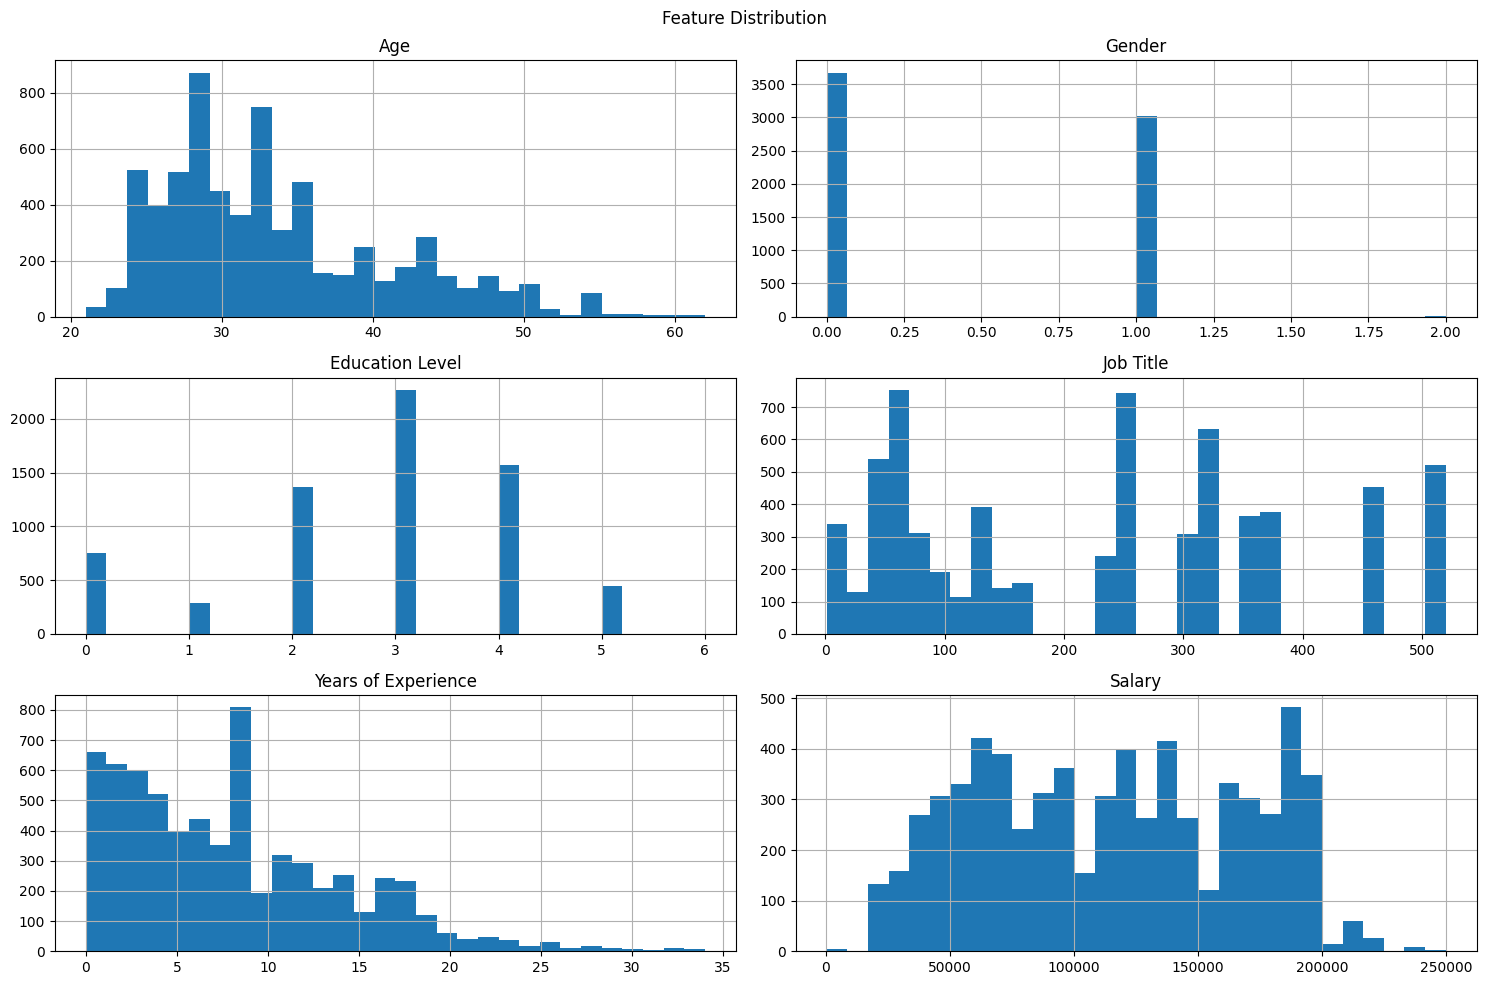

In [32]:
data.hist(figsize=(15,10),bins=30)
plt.suptitle('Feature Distribution')
plt.tight_layout()
plt.show()

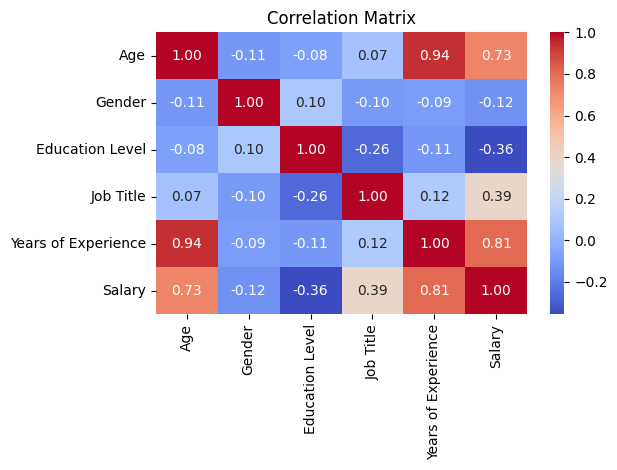

In [14]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix') 
plt.tight_layout()
plt.show()

Splitting the Data into Testing and Training sets

In [15]:
def TrainTestSplit(data,test_size=0.2):
    train = data.sample(frac=1-test_size,random_state=42)
    test = data.drop(train.index)
    return train.drop(columns=['Salary']),test.drop(columns=['Salary']),train['Salary'],test['Salary']  

In [16]:
Xtrain,Xtest,ytrain,ytest = TrainTestSplit(data)

Scaling the Data makes the Gradient Descent algorithm work well

In [17]:
def StandardScaler(c,mean, std):
    return (c-mean)/std

In [18]:
Xtrain_scaled = StandardScaler(Xtrain,Xtrain.mean(), Xtrain.std())
Xtest_scaled = StandardScaler(Xtest,Xtrain.mean(), Xtrain.std())

In [19]:
ytrain_scaled = StandardScaler(ytrain,ytrain.mean(), ytrain.std())
ytest_scaled = StandardScaler(ytest,ytrain.mean(), ytrain.std())

Creating Linear Regression Function which performs Gradient Descent to get values of Parameters w and b 

In [20]:
def LinearRegression_fit(X,y,alpha=0.01,epochs=1000):
    m,n = X.shape
    w = np.zeros(n)
    b = 0
    for _ in range(epochs):
        dw = np.zeros(n)
        db = 0
        for i in range(m):
            res = (np.dot(X[i],w) + b) - y[i]
            for j in range(n):
                dw[j] += res * X[i][j]
            db += res
        w = w - alpha*(dw/m) + 0.01*w/m
        b = b - alpha*(db/m)
    return w,b

Creating predict function which returns an array of predicted values

In [21]:
def LinearRegression_predict(X,w,b):
    y = []
    for i in range(X.shape[0]):
        y.append(np.dot(X[i],w) + b)
    return np.array(y)

In [22]:
ytest_scaled.head()

3    -1.052362
4     1.605074
5    -1.147271
9    -0.103278
16   -0.482912
Name: Salary, dtype: float64

In [23]:
w,b = LinearRegression_fit(Xtrain_scaled.values,ytrain_scaled.values)

In [24]:
ypred = LinearRegression_predict(Xtest_scaled.values, w, b)

The R^2 score function will return the performance score of our model

In [25]:
def r2_score(y_true,y_pred):
    y_true_mean = np.mean(y_true)
    ss_total = np.sum((y_true - y_true_mean)**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    return 1 - (ss_residual/ss_total)

In [26]:
ypred_trained = LinearRegression_predict(Xtrain_scaled.values, w, b)

In [27]:
print('R^2 Score of Training Data',r2_score(ytrain_scaled.values,ypred_trained))

R^2 Score of Training Data 0.7752968492352184


In [28]:
print('R^2 Score of Testing Data',r2_score(ytest_scaled.values,ypred))

R^2 Score of Testing Data 0.783188310028721


Since the R^2 Score of Training and Testing Data is almost same and not that bad (score>0.5) we can assume our model is neither Underfit nor Overfit and fits the given data quite well

Let's see the fit of our Model

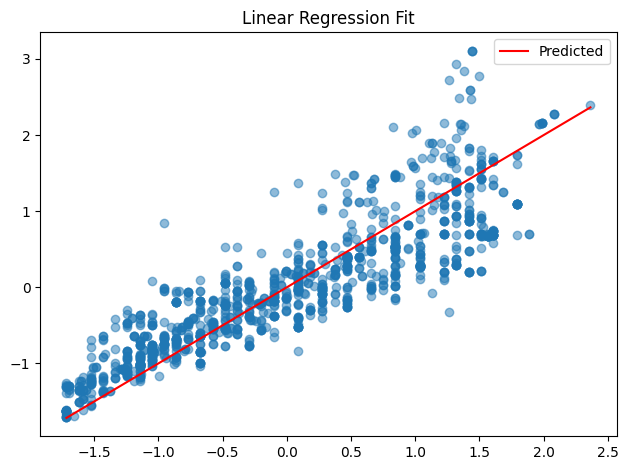

In [29]:
plt.scatter(ytest_scaled,ypred,alpha=0.5)
plt.plot([ytest_scaled.min(),ytest_scaled.max()],[ytest_scaled.min(),ytest_scaled.max()],color='red',label='Predicted')
plt.title('Linear Regression Fit')
plt.legend()
plt.tight_layout()
plt.show()